# 快速开始 matplotlib｜广泛使用的 Python 数据可视化模块

> 作者: Haohui Que [quehaohui@dp.tech](mailto:quehaohui@dp.tech)
>
> 创建日期: 2023-03-19 18:13
>
> 最后一次修改: Haohui Que [quehaohui@dp.tech](mailto:quehaohui@dp.tech), 
>
> 最后一次修改时间: 2023-03-21 2:30
>
> 描述: 本教程主要参考 [1]，可在 Bohrium Notebook 上直接运行。你可以点击界面上方蓝色按钮 `开始连接`，选择 `bohrium-notebook:2023-02-28` 镜像及任何一款节点配置，稍等片刻即可运行。
> 如您遇到任何问题，请联系 [bohrium@dp.tech](mailto:bohrium@dp.tech) 。
>
> 共享协议: 本作品采用[知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议](https://creativecommons.org/licenses/by-nc-sa/4.0/)进行许可。

## 目标

> **了解 matplotlib 的绘图对象并快速开始可自定义风格数据可视化练习。**

在学习本教程后，你将能够：

- 了解 matplotlib 的绘图对象并自定您的版型。
- 快速设计可视化中的各要素，例如轴、刻度与标签。
- 自定义绘图风格。

**阅读该教程【最多】约需 30 分钟，让我们开始吧！**


## 目录

<div align="left" style="margin:1.5rem"><img src="https://matplotlib.org/stable/_static/images/logo2.svg" alt="matplotlib" style="zoom: 40%;"></div>

* [一个简单的例子](#0)
* [1 图片的各部分](#1)
   * [1.1 图片本身](#1-1)
   * [1.2 Axes](#1-2)
   * [1.3 Axis](#1-3)
   * [1.4 Artist](#1-4)
* [2 绘图函数的输入类型](#2)
* [3 编码风格](#3)
   * [3.1 显式与隐式接口](#3-1)
   * [3.2 创建辅助函数](#3-2)
   * [3.3 ix_()函数](#3-3)
* [4 artist个性化](#4)
   * [4.1 颜色](#4-1)
   * [4.2 线宽，线型和标记大小](#4-2)
* [5 图片标签](#5)
   * [5.1 轴标签和文本](#5-1)
   * [5.2 在文本中使用数学表达式](#5-2)
   * [5.3 注释](#5-3)
   * [5.4 图例](#5-4)
* [6 轴刻度与标记](#6)
   * [6.1 刻度](#6-1)
   * [6.2 标记定位器和构建器](#6-2)
   * [6.3 绘制日期和字符串](#6-3)
   * [6.4 额外的Axis对象](#6-4)
* [7 颜色映射数据](#7)
   * [7.1 色图](#7-1)
   * [7.2 标准化](#7-2)
   * [7.3 色条](#7-3)
* [8 使用多个图形和轴](#8)
* [总结](#summary)
* [参考](#references)

## 一个简单的例子<a id ='0'></a>
Matplotlib在figures(例如windows，Jupyter小部件等)上绘制数据的图形，每个图形都可以包含一个或多个坐标轴，其中的点可以根据x-y坐标指定(或极坐标中的theta-r, 3D图中的x-y-z，等等)。创建带有坐标轴的图的最简单方法是使用**pyplot.subplot**,然后我们可以使用Axes.plot绘制坐标轴上的一些数据:

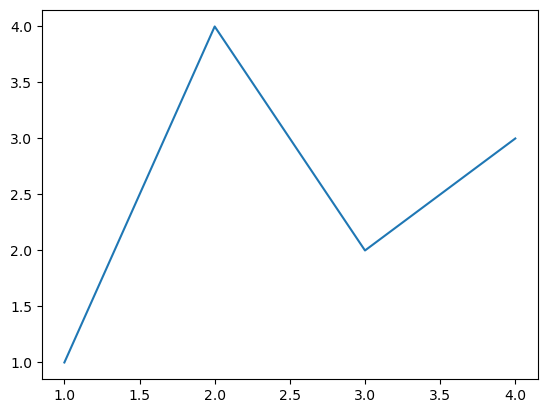

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # 建立一个单坐标轴的图示
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # 坐标数据赋值

注意，要显示这个图，您可能必须调用**plt.show()**，这取决于您的后端。

## 1 图片的各部分<a id ='1'></a>


### 1.1 图片本身<a id ='1-1'></a>
图片记录所有的子轴(标题，图形图例，色条等)，甚至嵌套的子图。

创建新Figure最简单的方法是使用pyplot:

<Figure size 640x480 with 0 Axes>

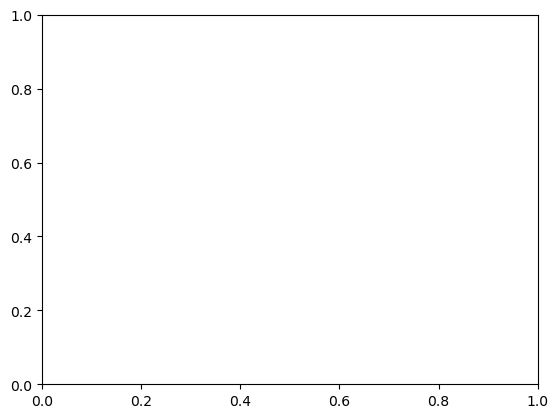

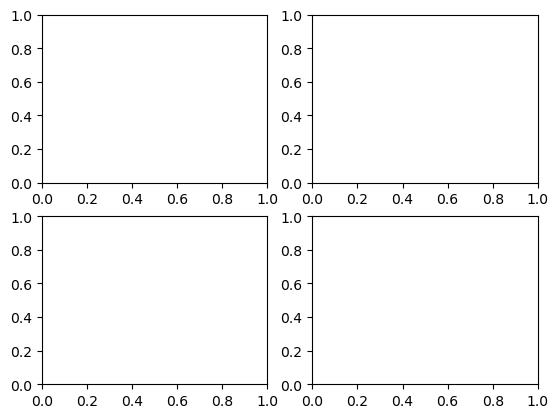

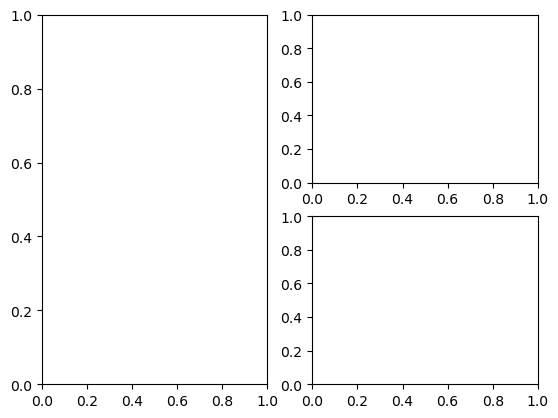

In [3]:
fig = plt.figure()  # 没有坐标轴的空白图
fig, ax = plt.subplots()  # 单轴图
fig, axs = plt.subplots(2, 2)  # 四个2*2网格大小的单轴图
fig, axs = plt.subplot_mosaic([['left', 'right-top'],
                               ['left', 'right-bottom']])#左侧一个图，右侧两个图

与图一起创建坐标轴通常是很方便的，但是在之后也可以手动添加坐标轴。  
注意，许多Matplotlib后端支持在图形窗口上缩放和平移。

### 1.2 Axes<a id ='1-2'></a>
轴是一个包含绘制数据区域的图形的参数，通常包括两个(在3D情况下是三个)轴(注意**Axes**和**Axis**之间的区别)，它们提供刻度和刻度标签，为轴中的数据提供刻度。每个轴还有一个标题(通过set_title()设置)、一个x-label(通过set_xlabel()设置)和一个y-label(通过set_ylabel()设置)。

Axes类及其成员函数是使用OOP接口的主要入口，大多数绘图方法都是在他们基础上定义的(例如，上面所示的ax.plot()就使用了plot方法)

### 1.3 Axis<a id ='1-3'></a>
这些对象设置刻度和限制，并生成刻度(轴上的标记)和刻度标签(标记刻度的字符串)。刻度的位置由Locator对象确定，刻度标签字符串由Formatter构建。正确的Locator和Formatter的组合可以很好地控制标记位置和标签。

### 1.4 Artist<a id ='1-4'></a>
基本上，图形上可见的所有东西都是artist(甚至是figure、axes和axis对象)。这包括文本对象，Line2D对象，collections对象，patch对象等。当图像被渲染时，所有的artist都被绘制到“画布”上。大多数artist都依赖于axes;这样的artist不能被多个轴共享，也不能从一个轴移动到另一个轴。

## 2 绘图函数的输入类型<a id ='2'></a>
绘图函数需要numpy.array或numpy.ma.masked_array作为输入，或者可以被传递给numpy.asarray的对象。类似于数组(“类数组”)，如pandas数据对象和numpy.matrix,可能无法按预期工作。一般约定俗成，将这些转换为numpy.array对象方便绘图。 
例如，如何转换numpy.matrix：

In [4]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

大多数方法还将解析可寻址对象，如dict、numpy.recarray或者pandas.DataFrame。Matplotlib允许您提供data关键字参数，并通过与x和y变量对应的字符串生成图形。

Text(0, 0.5, 'entry b')

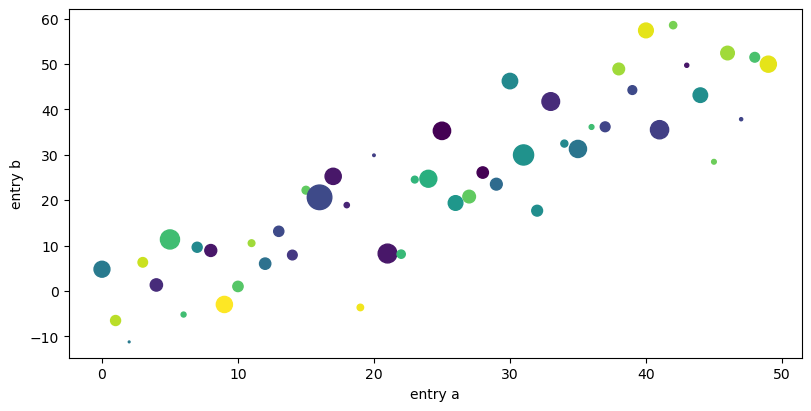

In [5]:
np.random.seed(19680801)  # 为随机数生成器提供种子。
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')# x轴标签
ax.set_ylabel('entry b')# y轴标签

## 3 编码风格<a id ='3'></a>


### 3.1 显式与隐式接口<a id ='3-1'></a>
如上所述，基本上有两种使用Matplotlib的方法:

- 显式地创建图和轴，并在它们上调用方法(“the "object-oriented (oo) style"”)。

- 依靠pyplot隐式地创建和管理图和轴，并使用pyplot函数进行绘图。

使用oo-style的例子：

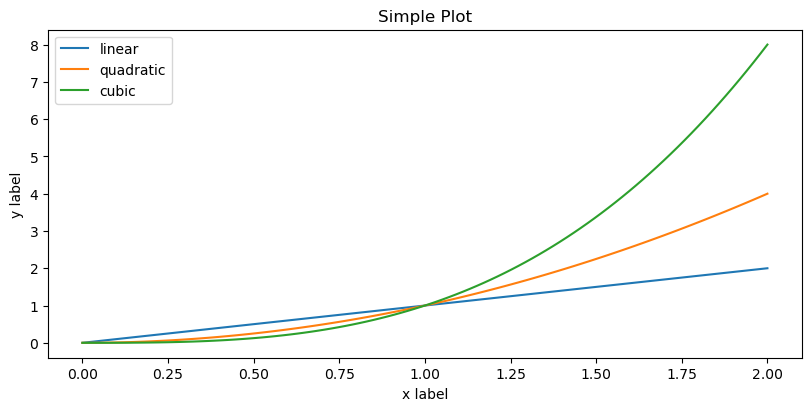

In [6]:
x = np.linspace(0, 2, 100)  # 数据样本（0-2之间100个均匀的序列）.

fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
ax.plot(x, x, label='linear')  # 在轴上绘制数据
ax.plot(x, x**2, label='quadratic')  
ax.plot(x, x**3, label='cubic')  
ax.set_xlabel('x label')  
ax.set_ylabel('y label') 
ax.set_title("Simple Plot")  # 设置标题.
ax.legend()  # 添加图例

pyplot-style的例子：

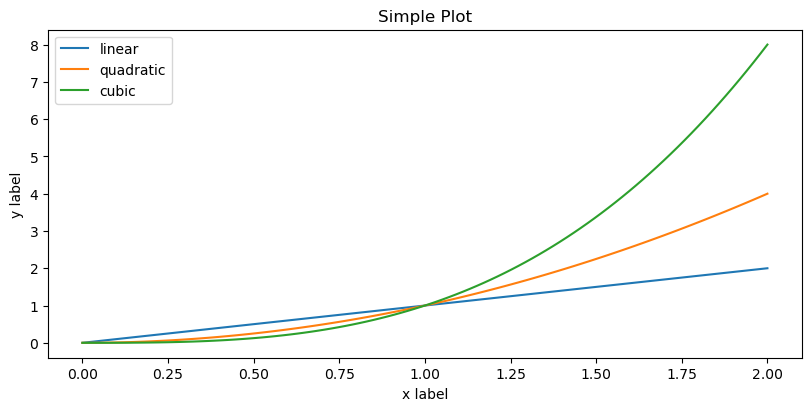

In [7]:
x = np.linspace(0, 2, 100)  

plt.figure(figsize=(8, 4), layout='constrained')
plt.plot(x, x, label='linear')  
plt.plot(x, x**2, label='quadratic') 
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

Matplotlib的文档和示例同时使用oo和pyplot样式。一般来说，建议使用oo-style，特别是对于作为更大项目的一部分反复重用的复杂的图、函数和脚本。但是，pyplot-style可以非常方便地进行快速交互工作。

### 3.2 创建辅助函数<a id ='3-2'></a>
如果您需要使用不同的数据集反复制作相同的图形，或者希望轻松地包装Matplotlib方法，可以使用下面推荐的签名函数。

In [8]:
def my_plotter(ax, data1, data2, param_dict):
    """
    帮助绘制图表的辅助函数
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

会绘制两个子图:

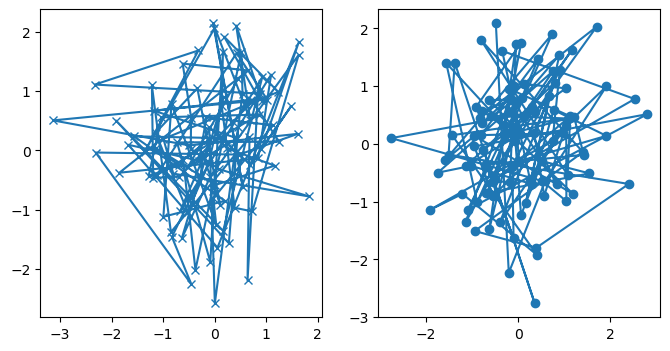

In [9]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # 创建四个随机数据集
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

注意，如果你想安装这些作为python包，或任何其他定制，你可以使用网上的许多模板之一。

## 4 artist个性化<a id ='4'></a>
大多数绘图方法都有artist的样式选项，可以在调用绘图方法时选用，也可以从artist的“setter”中访问。在下面的plot中，我们手动设置了由plot创建的Artists的颜色、线宽和线条样式，并使用set_linstyle设置了第二条线的线条样式。

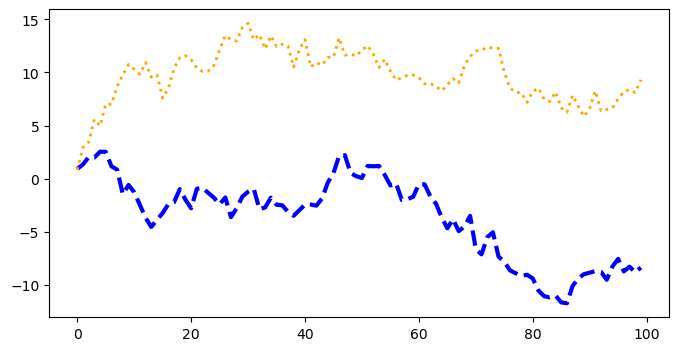

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

### 4.1 颜色<a id ='4-1'></a>
Matplotlib有一个非常灵活的颜色数组，大多数artist都能实现;有关规格列表，请参阅颜色教程。有些artist可以使用多种颜色。例如，对于散点图，标记的边缘可以与内部是不同的颜色:

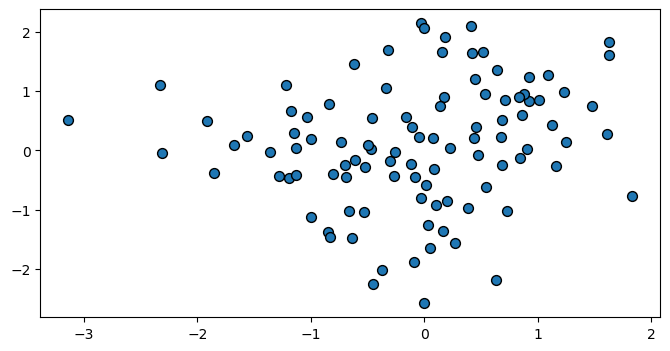

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

### 4.2 线宽，线型和标记大小<a id ='4-2'></a>
线条宽度通常以印刷点为单位(1 pt = 1/72英寸)，适用于有描边线条的artist。类似地，笔画线也可以有线型。请参阅线性样式示例。

标记的大小取决于所使用的方法。Plot以点为单位指定标记的大小，通常是标记的“直径”或宽度。Scatter指定标记的大小与标记的可视区域大致成比例。有一系列可用的标记样式作为字符串代码，或者用户可以定义自己的标记样式:

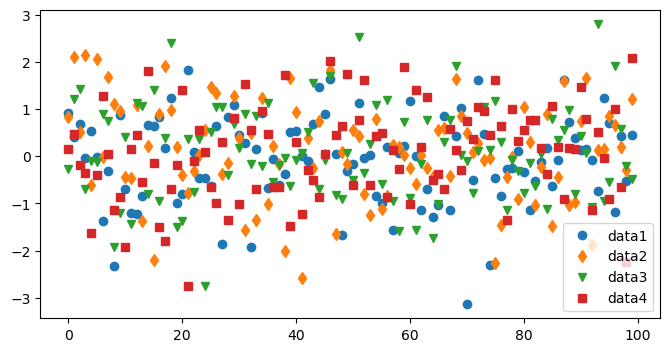

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

## 5 图片标签<a id ='5'></a>


### 5.1 轴标签和文本<a id ='5-1'></a>
set_xlabel, set_ylabel和set_title用于在指定的位置添加文本：

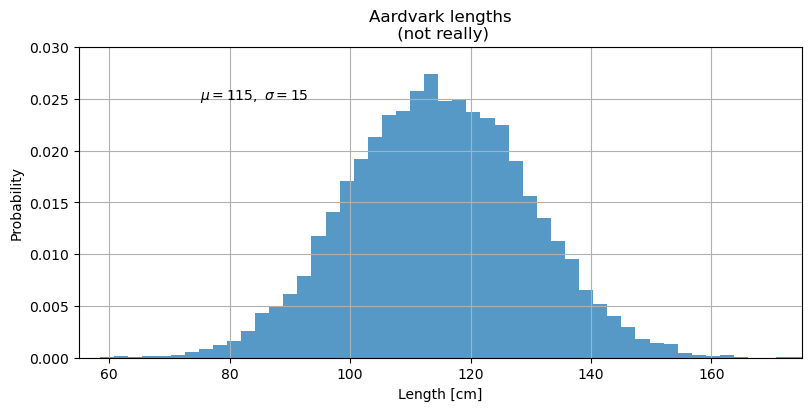

In [13]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
# 数据的直方图
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

所有的文本函数都返回一个matplotlib.text.Text实例。就像上面一样，你可以通过将关键字参数传递到文本函数中来定制属性:

In [14]:
t = ax.set_xlabel('my data', fontsize=14, color='red')

### 5.2 在文本中使用数学表达式<a id ='5-2'></a>
Matplotlib接受任何文本表达式中的TeX方程表达式。

In [15]:
ax.set_title(r'$\sigma_i=15$')

Text(0.5, 1.0, '$\\sigma_i=15$')

其中，标题字符串前面的r表示字符串是原始字符串，并且不将反斜杠视为python转义。Matplotlib有一个内置的TeX表达式解析器和布局引擎，并提供了自己的数学字体有关的详细信息，请参阅编写数学表达式。

您还可以直接使用LaTeX来构建文本，并将输出直接合并到显示图形或保存的后记中，请参见使用LaTeX进行文本呈现。

### 5.3 注释<a id ='5-3'></a>
我们还可以注释一个plot上的点，通常是通过将指向xy的箭头连接到xy文本中的一段文本:

(-2.0, 2.0)

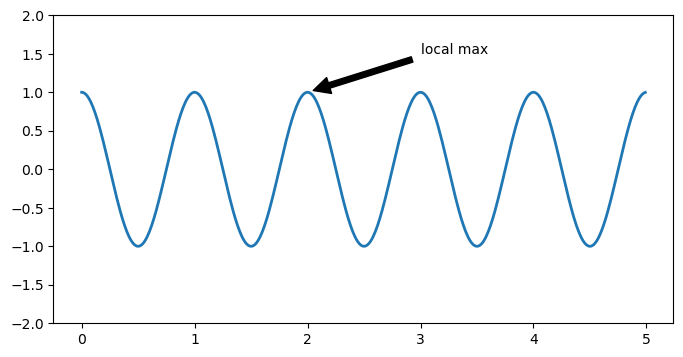

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)# 设置y的最小最大值

在这个基本示例中，xy和xy文本都在数据坐标中。还有很多其他的坐标系可供选择。

### 5.4 图例<a id ='5-4'></a>
通常我们用 `Axes.legend` 来标识线条或标记：

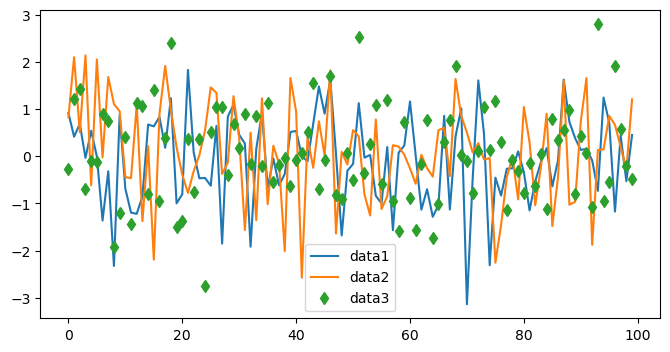

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

Matplotlib中的图例在布局、位置和它们所代表的artist方面都非常灵活。

## 6 轴刻度与标记<a id ='6'></a>
每个轴都有两个(或三个)Axis对象表示x轴和y轴。这些控件控制Axis的规模、刻度定位器和刻度构建器。可以附加其他Axis来显示更多的Axis对象。

### 6.1 刻度<a id ='6-1'></a>
除了线性标度，Matplotlib还提供了非线性标度，比如对数标度。由于对数尺度被广泛使用，所以也有直接的方法，如loglog、semilogx和semimogy。有许多量表(其他示例参见量表)。这里我们手动设置刻度:

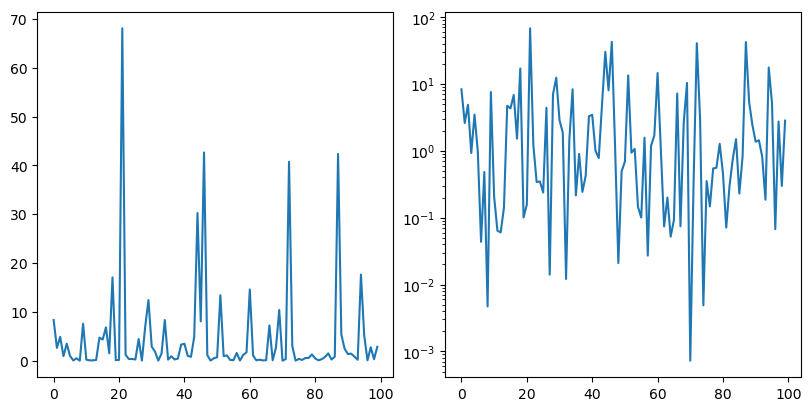

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='constrained')
xdata = np.arange(len(data1))
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

标尺设置从数据值到沿轴线的间距的映射。这是双向发生的，并被组合成一个转换，这是Matplotlib从数据坐标映射到坐标轴、图或屏幕坐标的方式。

### 6.2 标记定位器和构建器<a id ='6-2'></a>
每个Axis都有一个标记定位器和构建器，用于选择沿Axis对象放置标记的位置。一个简单的接口是set_xticks：

Text(0.5, 1.0, 'Manual ticks')

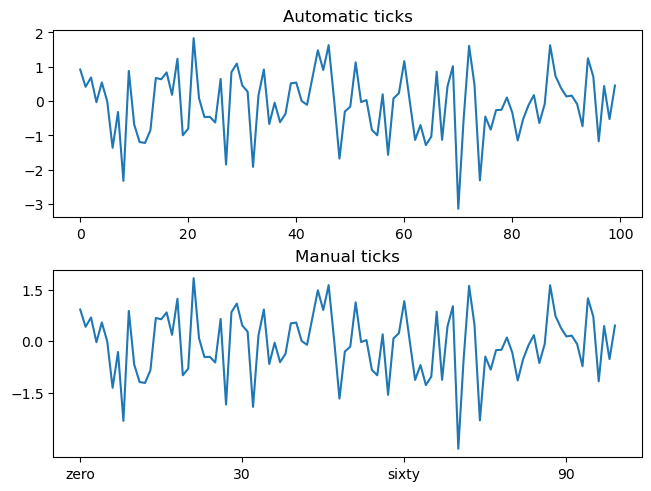

In [19]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5]) 
axs[1].set_title('Manual ticks')

不同的刻度可以有不同的定位器和构建器。


### 6.3 绘制日期和字符串<a id ='6-3'></a>
Matplotlib可以处理日期数组和字符串数组的绘图，以及浮点数。它们可以获得特殊的定位器和构建器。

日期:

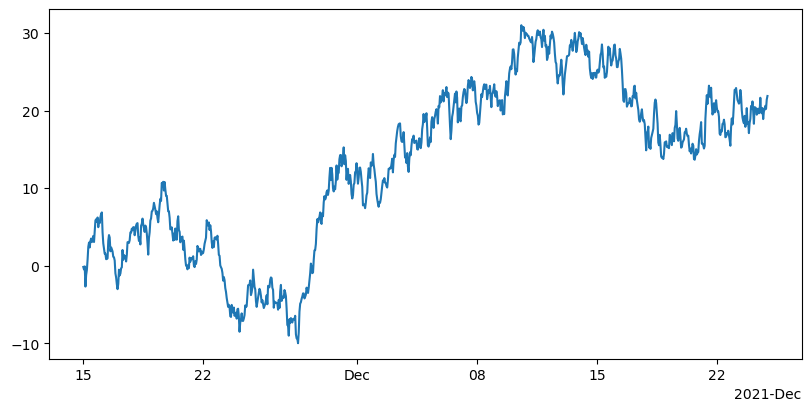

In [20]:
fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

对于字符串，我们得到分类绘图：

<BarContainer object of 4 artists>

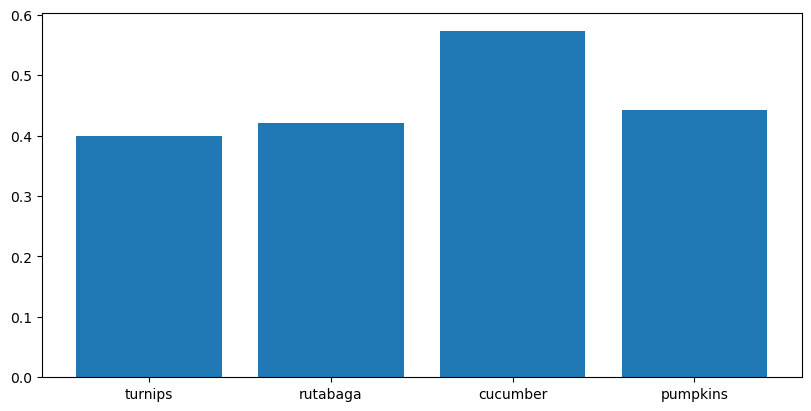

In [21]:
fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

关于分类绘图的一个注意事项是，一些解析文本文件的方法会返回字符串列表，即使这些字符串都表示数字或日期。如果您传递1000个字符串，Matplotlib将认为您指的是1000个类别，并将向您的图中添加1000个刻度。

### 6.4 额外的Axis对象<a id ='6-4'></a>
在一个图表中绘制不同大小的数据可能需要一个额外的y轴。这样的轴可以通过使用twinx添加一个新的轴来创建，该轴具有一个不可见的x轴和一个位于右侧的y轴(类似于twiny)。另一个例子请参见不同尺度的图。

类似地，您可以添加一个secondary_xaxis或secondary_yaxis，其规模与主轴不同，以不同的刻度或单位表示数据。

Text(0.5, 0, 'Angle [°]')

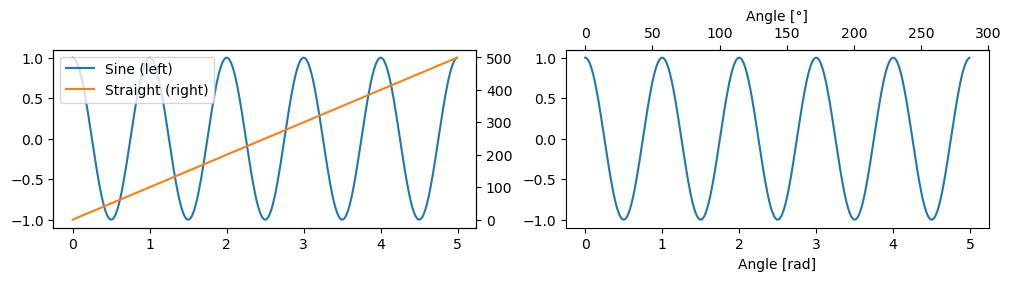

In [22]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

## 7 颜色映射数据<a id ='7'></a>
通常我们希望在一个由色图中的颜色表示的图中有第三个维度。Matplotlib有许多这样做的图类型:

Text(0.5, 1.0, 'scatter()')

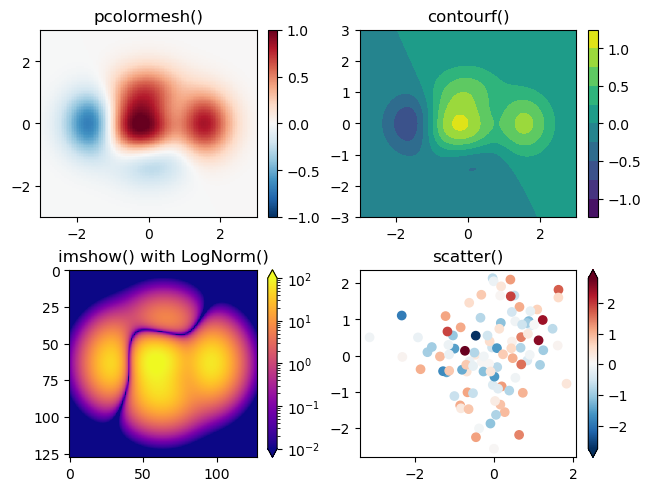

In [23]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

### 7.1 色图<a id ='7-1'></a>
这些都是源自ScalarMappable对象中的artist的例子。它们都可以将vmin和vmax之间的线性映射设置为cmap指定的色图。Matplotlib有许多色图可供选择(在Matplotlib中选择色图)，您可以自己制作(在Matplotlib中创建色图)或通过第三方包下载。

### 7.2 标准化<a id ='7-2'></a>
有时我们想要获得色图中数据的非线性映射，如上面的LogNorm示例中所示。我们通过为ScalarMappable提供规范参数，而不是vmin和vmax来做到这一点。

### 7.3 色条<a id ='7-3'></a>
添加色条将颜色与底层数据关联起来。色条是数字级的artist，与ScalarMappable关联(在那里它们获得关于规范和颜色映射的信息)。

还可以使用extend关键字更改颜色条的外观，以便在末尾添加箭头，并通过shrink和aspect以控制大小。最后，色条将有适合规范的默认定位器和构建器。这些可以像其他Axis对象一样进行更改。

## 8 使用多个图形和轴<a id ='8'></a>
你可以通过多次调用fig = plt.figure()或fig2, ax = plt.subplots()来打开多个图。通过保持对象引用，可以将artist添加到任意一个Figure中。

可以通过多种方式添加多个轴，但最基本的是上面使用的plt.subplots()。也可以使用subplot_mosaic实现更复杂的布局，axis对象可以跨列或行。

Text(0.5, 1.0, 'right')

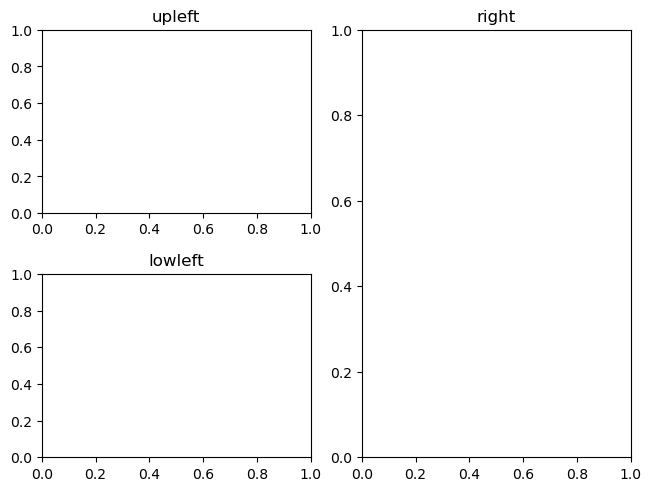

In [24]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')

## 总结 <a id='summary'></a>

在本教程中，您学习了在 matplotlib 中的一些基础方法。 

具体而言，您了解到： 
- 了解 matplotlib 的绘图对象并自定您的版型。
- 快速设计可视化中的各要素，例如轴、刻度与标签。
- 自定义绘图风格。
 
你有什么问题吗？ 欢迎与我们联系 [bohrium@dp.tech](mailto:bohrium@dp.tech) 。

## 参考 <a id='references'></a>

1. https://matplotlib.org/stable/tutorials/introductory/quick_start.html

<a href="https://bohrium.dp.tech/notebook/b7799befc1d84ce096128a897369f751" target="_blank"><img src="https://cdn.dp.tech/bohrium/web/static/images/open-in-bohrium.svg" alt="Open In Bohrium"/></a>